#<font color='red'> <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

#<font color='green'> Github Link :

## <font color='Blue'><b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <font color='red'> <b> Data Description </b>

### <font color='Blue'> <b>Rossmann Stores Data.csv </b> - <font color='black'>historical data including Sales
### <font color='Blue'> <b>store.csv </b> - <font color='black'>supplemental information about the stores


### <font color='red'> <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#**<font color='red'> Loading Libraries & Data**

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns


In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading Rossman Dataset
rossman_dataset = pd.read_csv('/content/drive/MyDrive/Project_New/Retail_Sales_Prediction/Rossmann Stores Data.csv',low_memory= False)

In [4]:
# Loading Store Dataset
store_dataset = pd.read_csv('/content/drive/MyDrive/Project_New/Retail_Sales_Prediction/store.csv',low_memory= False)

## <font color='red'>**Analysing the Rossman Dataset**

In [5]:
rossman_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
rossman_dataset.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


#####<font color='blue'>    **Checking Information about Dataset**

In [7]:
rossman_dataset.shape

(1017209, 9)

In [8]:
# Checking info of data as data types and rows and cols
rossman_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
 # Checking Null Values
rossman_dataset.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<font color='Blue'>**Summary Statastics Of Dataset**

In [10]:
# Summary Statastics
rossman_dataset.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
# No. Of Stores in the Dataset
rossman_dataset.Store.nunique()

1115

In [12]:
# Value_counts of StateHoliday Column
rossman_dataset.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [13]:
print(rossman_dataset['Date'].min(),'initial')
print(rossman_dataset['Date'].max(),'final')

2013-01-01 initial
2015-07-31 final


<font color='Blue'> **This tells us we have a data of almost 3 years.**

In [14]:
# extract year, month, day and week of year from "Date"

rossman_dataset['Date']=pd.to_datetime(rossman_dataset['Date'])
rossman_dataset['Year'] = rossman_dataset['Date'].apply(lambda x: x.year)
rossman_dataset['Month'] = rossman_dataset['Date'].apply(lambda x: x.month)
rossman_dataset['Day'] = rossman_dataset['Date'].apply(lambda x: x.day)
rossman_dataset['WeekOfYear'] = rossman_dataset['Date'].apply(lambda x: x.weekofyear)

In [15]:
rossman_dataset.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_dataset.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31


##<font color='Blue'> **EDA On Rossman Dataset**

####<font color='green'> **Heatmap of the Rossman Dataset**

<Axes: >

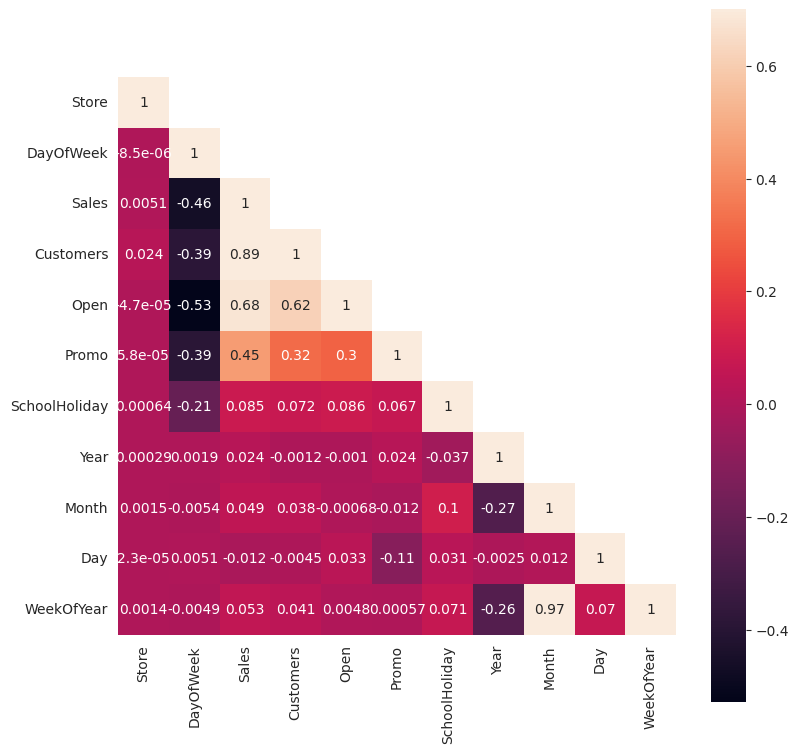

In [16]:
correlation_map = rossman_dataset[rossman_dataset.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

<font color='green'>**As we can see that in the graph given below that Stores mainly closed on Sunday**

<Axes: xlabel='DayOfWeek', ylabel='count'>

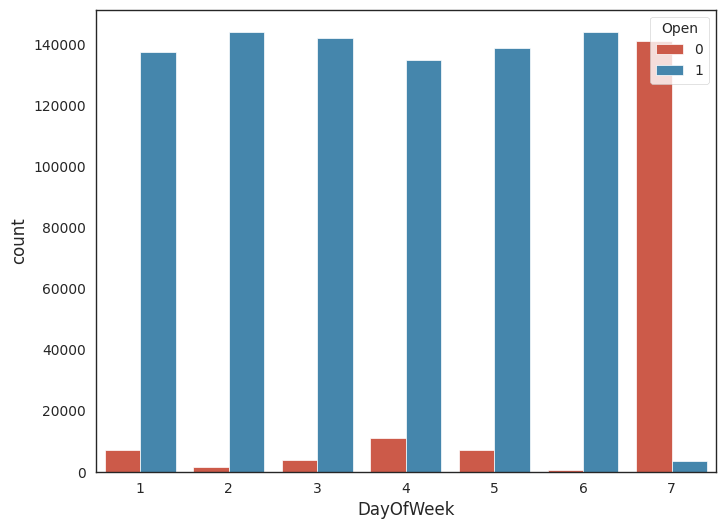

In [17]:
sns.countplot(x='DayOfWeek',hue='Open',data=rossman_dataset)

<font color='Blue'>**Sales Are nearly doubled High When Promo is Running**

<Axes: xlabel='Promo', ylabel='Sales'>

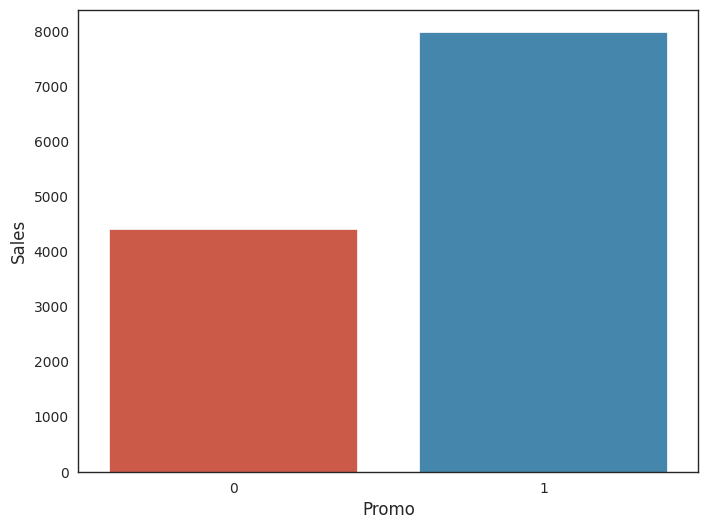

In [18]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(rossman_dataset.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

<font color='green'>**As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve.**

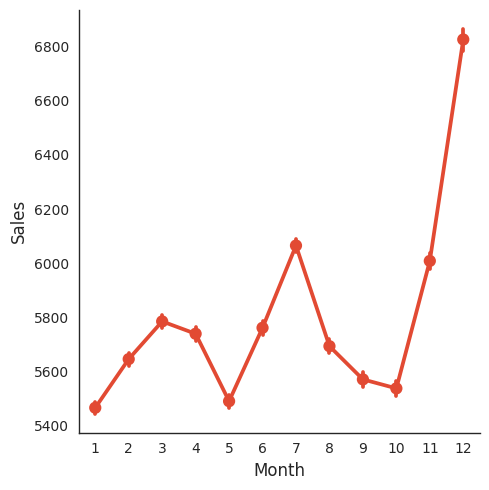

In [19]:
sns.catplot(x="Month" ,y = "Sales" , data=rossman_dataset, kind="point")

In [20]:
# Value Counts of SchoolHoliday Column
rossman_dataset.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

<font color='green'>**As we can see in the Piechart Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday**

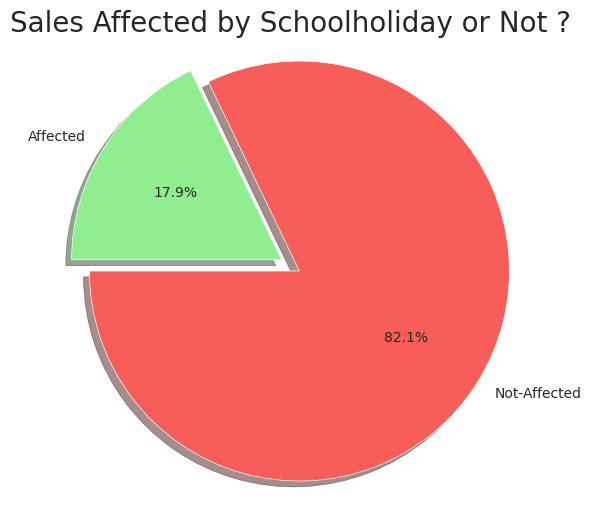

In [21]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_dataset.SchoolHoliday.value_counts()
colors = ['#F75D59', 'lightgreen']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


### <font color='Blue'> **Transforming Variable StateHoliday**

In [22]:
rossman_dataset["StateHoliday"] = rossman_dataset["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [23]:
rossman_dataset.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

<font color='green'>**As we can see in the Piechart Sales affected by State Holiday is only 3% means Sales aren't afffected by State Holiday**

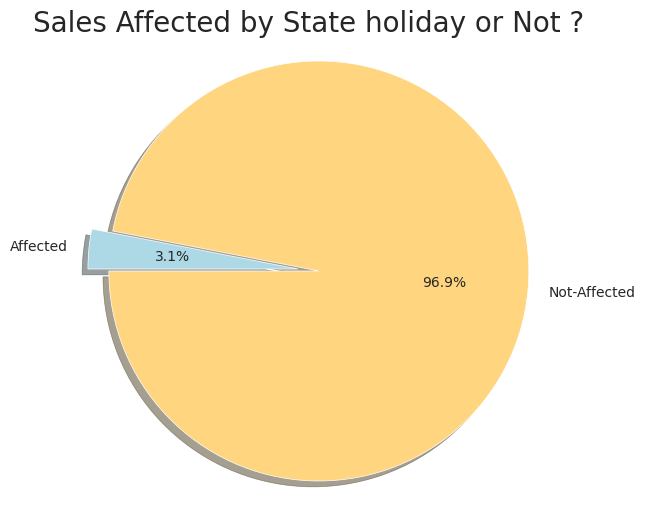

In [24]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_dataset.StateHoliday.value_counts()
colors = ['#FFD580','lightblue']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

<font color='green'>**As Sales isn't much affected by State Holiday so i'm removing this column**

In [25]:
rossman_dataset.drop('StateHoliday',inplace=True,axis=1)

<font color='Blue'>**Histogram Representation of Sales. Here 0 is showing because most of the time store was closed.**

**Customers, CompetitionDistance, StoreType_d, Promo these four are most important features in our sales prediction.**

In [ ]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3,train_score_4,train_score_5],'Test_Score':[test_score_1,test_score_2,test_score_3,test_score_4,test_score_5]},index=['Linear Regression','Lasso Regression','Decision Tree',"Decision Tree(hyperparameters)",'Random Forest Regression'])

# **Conclusion**

In [ ]:
score_df

,Train_Score,Test_Score
Linear Regression,0.780750,0.782392
Lasso Regression,0.780731,0.782369
Decision Tree,0.999996,0.915698
Decision Tree(hyperparameters),0.963506,0.935415
Random Forest Regression,0.993811,0.956433


**Random Forest regressor achieved lowest MAPE as 5.65% showing that it is a highly accurate model. MAE is the average magnitude of error produced by your model, the MAPE is how far the model’s predictions are off from their corresponding outputs on average**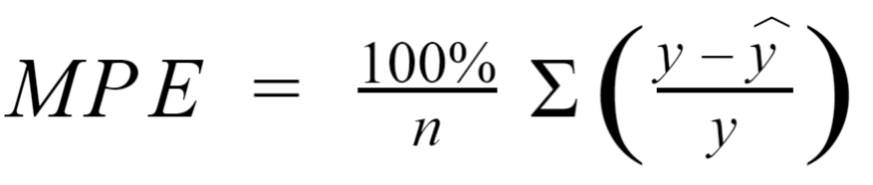